In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Detailed-Sales-Report.csv')
df

,SNO,DATE,INVOICE_NO,CLIENT,PRODUCT,PRODUCT_CODE,QUANTITY,RATE,DISCOUNT,TAXABLE,TAX,AMOUNT_AFTER_TAX
0,1,11-08-2023,INV11,Ashiq,Maaza big,NaN,1,20,0,20,0,20
1,2,11-08-2023,INV11,Ashiq,Watermelon Juice,1.0,2,40,0,80,0,80
2,3,11-08-2023,INV12,Ashiq,Maaza big,NaN,1,20,0,20,0,20
3,4,11-08-2023,INV13,Ashiq,Muskmelon Juice,2.0,3,40,0,120,0,120
4,5,11-08-2023,INV13,Ashiq,Chocolate milkshake,NaN,1,75,0,75,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...
3374,3375,08-09-2023,INV2260,Swetha,Rose milk,NaN,1,45,0,45,0,45
3375,3376,08-09-2023,INV2260,Swetha,Musambi juice,NaN,1,50,0,50,0,50
3376,3377,08-09-2023,INV2261,Akshitha,Rose milk,NaN,3,45,0,135,0,135
3377,3378,08-09-2023,INV2262,Moshika,Bread omlette,NaN,1,60,0,60,0,60


In [ ]:
df.isnull().sum()

SNO                    0
DATE                   0
INVOICE_NO             0
CLIENT                 0
PRODUCT                0
PRODUCT_CODE        2784
QUANTITY               0
RATE                   0
DISCOUNT               0
TAXABLE                0
TAX                    0
AMOUNT_AFTER_TAX       0
dtype: int64

In [ ]:
df.drop('PRODUCT_CODE',axis =1)

,SNO,DATE,INVOICE_NO,CLIENT,PRODUCT,QUANTITY,RATE,DISCOUNT,TAXABLE,TAX,AMOUNT_AFTER_TAX
0,1,11-08-2023,INV11,Ashiq,Maaza big,1,20,0,20,0,20
1,2,11-08-2023,INV11,Ashiq,Watermelon Juice,2,40,0,80,0,80
2,3,11-08-2023,INV12,Ashiq,Maaza big,1,20,0,20,0,20
3,4,11-08-2023,INV13,Ashiq,Muskmelon Juice,3,40,0,120,0,120
4,5,11-08-2023,INV13,Ashiq,Chocolate milkshake,1,75,0,75,0,75
...,...,...,...,...,...,...,...,...,...,...,...
3374,3375,08-09-2023,INV2260,Swetha,Rose milk,1,45,0,45,0,45
3375,3376,08-09-2023,INV2260,Swetha,Musambi juice,1,50,0,50,0,50
3376,3377,08-09-2023,INV2261,Akshitha,Rose milk,3,45,0,135,0,135
3377,3378,08-09-2023,INV2262,Moshika,Bread omlette,1,60,0,60,0,60


In [ ]:
top1 = df.groupby('PRODUCT')['QUANTITY'].sum().nlargest(10)
top1

PRODUCT
Watermelon Juice    573
Musambi juice       201
Lemon juice         182
Muskmelon Juice     180
Cold coffee         132
Chicken popcorn     110
Maaza small          96
Bread omlette        93
Chicken wrap         88
Oreo milkshake       75
Name: QUANTITY, dtype: int64

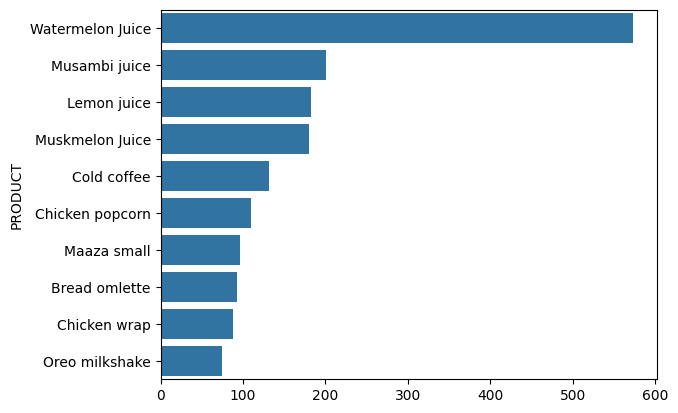

In [ ]:
sns.barplot(x= top1.values , y= top1.index)
plt.show()

In [ ]:
t2 = df.groupby('PRODUCT') ['AMOUNT_AFTER_TAX'].sum().nlargest(10)
t2

PRODUCT
Watermelon Juice         22920
Musambi juice            10050
Chicken popcorn           9900
Muskmelon Juice           7200
Chicken wrap              7040
Oreo milkshake            6000
Cold coffee               5940
Crispy chicken burger     5700
Bread omlette             5580
Chicken nuggets           5325
Name: AMOUNT_AFTER_TAX, dtype: int64

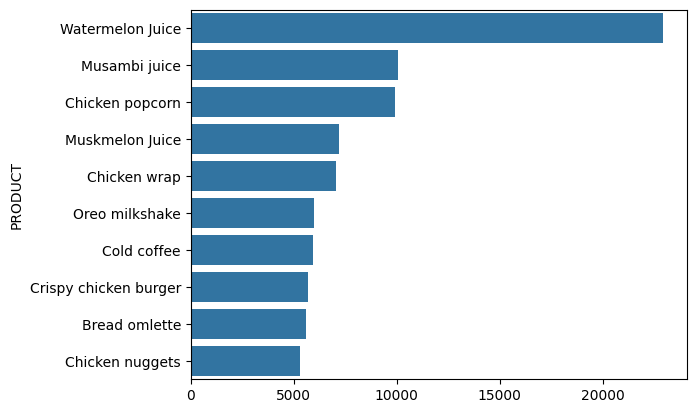

In [ ]:
sns.barplot(x= t2.values , y= t2.index)
plt.show()

In [ ]:
aov = df['AMOUNT_AFTER_TAX'].sum()/df['INVOICE_NO'].nunique()
aov

97.52268602540835

In [ ]:
t4 = df[df['PRODUCT'] == 'Chicken momos']
t4r = t4.groupby('PRODUCT').agg({ 'QUANTITY': lambda x:x.sum(),
                                  'AMOUNT_AFTER_TAX': lambda x:x.sum()})
t4r

,QUANTITY,AMOUNT_AFTER_TAX
PRODUCT,,
Chicken momos,32,2880


In [ ]:
t5 = df[df['CLIENT'] == 'Reshma']
t5

,SNO,DATE,INVOICE_NO,CLIENT,PRODUCT,PRODUCT_CODE,QUANTITY,RATE,DISCOUNT,TAXABLE,TAX,AMOUNT_AFTER_TAX
1737,1738,28-08-2023,INV1174,Reshma,Oreo milkshake,NaN,1,80,0,80,0,80
2646,2647,04-09-2023,INV1759,Reshma,Oreo milkshake,NaN,1,80,0,80,0,80
2647,2648,04-09-2023,INV1759,Reshma,Blackcurrant mojito,NaN,1,70,0,70,0,70
2652,2653,04-09-2023,INV1764,Reshma,Lemon juice,NaN,1,25,0,25,0,25
3249,3250,08-09-2023,INV2177,Reshma,Crispy chicken sandwich,NaN,1,80,0,80,0,80
3250,3251,08-09-2023,INV2177,Reshma,Potato wedges,NaN,1,45,0,45,0,45
3251,3252,08-09-2023,INV2177,Reshma,Oreo milkshake,NaN,1,80,0,80,0,80


In [ ]:
t5['AMOUNT_AFTER_TAX'].sum()

460

In [ ]:
t6 = df[(df['CLIENT'] == 'Pooja') & (df['PRODUCT'] == 'Muskmelon Juice')]
t6

,SNO,DATE,INVOICE_NO,CLIENT,PRODUCT,PRODUCT_CODE,QUANTITY,RATE,DISCOUNT,TAXABLE,TAX,AMOUNT_AFTER_TAX
2874,2875,05-09-2023,INV1923,Pooja,Muskmelon Juice,2.0,1,40,0,40,0,40


In [ ]:
t7 = df[df['PRODUCT'] == 'Cotton Candy']
t7['AMOUNT_AFTER_TAX'].sum()

210

In [ ]:
t7

,SNO,DATE,INVOICE_NO,CLIENT,PRODUCT,PRODUCT_CODE,QUANTITY,RATE,DISCOUNT,TAXABLE,TAX,AMOUNT_AFTER_TAX
2583,2584,02-09-2023,INV1714,Kowshika,Cotton Candy,NaN,1,5,0,5,0,5
2739,2740,04-09-2023,INV1828,Ashiq,Cotton Candy,NaN,4,5,0,20,0,20
2745,2746,04-09-2023,INV1834,Hari,Cotton Candy,NaN,5,5,0,25,0,25
2777,2778,04-09-2023,INV1858,Noyal,Cotton Candy,NaN,4,5,0,20,0,20
2836,2837,04-09-2023,INV1892,Sharanya,Cotton Candy,NaN,3,5,0,15,0,15
2843,2844,04-09-2023,INV1896,Sharanya,Cotton Candy,NaN,1,5,0,5,0,5
2964,2965,05-09-2023,INV1979,Ashiq,Cotton Candy,NaN,1,5,0,5,0,5
3023,3024,07-09-2023,INV2023,Ashiq,Cotton Candy,NaN,4,5,0,20,0,20
3099,3100,07-09-2023,INV2073,Ashiq,Cotton Candy,NaN,1,5,0,5,0,5
3106,3107,07-09-2023,INV2080,Ashiq,Cotton Candy,NaN,1,5,0,5,0,5


In [ ]:
t8 = df[df['INVOICE_NO']  == 'INV993']
t8['CLIENT'].unique()

array(['Monika'], dtype=object)

In [ ]:
t9 = df[df['CLIENT'] == 'Ajay']
t9['INVOICE_NO'].nunique()

11

In [ ]:
df['DISCOUNT'].unique()

array([0])

In [ ]:
t10 = df['DISCOUNT'].nlargest(5)
t10

0    0
1    0
2    0
3    0
4    0
Name: DISCOUNT, dtype: int64